###Downloading dataset


In [ ]:
#pip install opendatasets --upgrade

In [1]:
import opendatasets as od
url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Abort: 

In [ ]:
data='./us-accidents/US_Accidents_Dec20_updated.csv'

###Reading data set



In [50]:
import pandas as pd
df = pd.read_csv(data)

In [ ]:
df

###checking columns and other info



In [ ]:
df.columns


In [ ]:
len(df.columns)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.dtypes

###Questions

Q1. Do warmer people have more accidents or colder?

Q2. Name the 5 states with most number of accidents? How about per capita

Q3. Does New York show up in the data?if yes why is the count so low even though its the most populated city

Q4. What time of the day are accidents more frequent in?

Q5. Which days of the week are accidents more common in?

Q6. Which months have most accidents?

Q7. Show trends of accidents year by year(increase/decrease)

finding number of numeric columns

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

number of null entries per column

In [ ]:
df.isna().sum()

Finding and plotting missing percentages

In [ ]:
missing_perc=100*df.isna().sum().sort_values(ascending=False)/len(df)
missing_perc

removing 0s from data

In [ ]:
missing_perc[missing_perc!=0]

In [ ]:
missing_perc[missing_perc!=0].plot(kind='barh')

Analyse Columns:



1.   City
2.   Start time
3.   Start lat, start long
4.   Temperature
5.   Weather Condition




###City

In [ ]:
df.City

In [ ]:
df.City.unique()

In [ ]:
city_acc = df.City.value_counts()
city_acc

Los Angeles             39984
Miami                   36233
Charlotte               22203
Houston                 20843
Dallas                  19497
                        ...  
Irwinton                    1
Normandy Park               1
Morehead City               1
Lake Andes                  1
Township 1 Charlotte        1
Name: City, Length: 10657, dtype: int64

top 20 rows

In [ ]:
city_acc[:20].plot(kind="barh")

Check if New York in Data


In [ ]:
'New York' in list(df.City)

Creating another graph using seaborn

In [52]:
import seaborn as sns
sns.set_style("darkgrid")

using log scale

In [ ]:
sns.histplot(city_acc,log_scale=True)

classifying cities in low and high

In [ ]:
high_acc_cities=city_acc[city_acc>1000]
low_acc_cities=city_acc[city_acc<=1000]


In [ ]:
len(high_acc_cities)/len(city_acc)


In [ ]:
len(low_acc_cities)

In [ ]:
sns.distplot(high_acc_cities)

SUMMARY-


1.   New York has very less accidents even though it has the highest population
2.   Less than 2% cities have accidents more than 1000
3.   An unusually high number of cities reported only 1 accidents



###Start time

In [ ]:
df.Start_Time

Converting object to date time 

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time

Graph for hours of the day

In [ ]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

Graph for each week

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)

Making percentage distplot

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False, norm_hist=True)

Checking graph for sunday

In [ ]:
sunday=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday.dt.hour, bins=24, kde=False, norm_hist=True)

Checking graph for monday

In [ ]:
monday=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday.dt.hour, bins=24, kde=False, norm_hist=True)

Monthly Graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


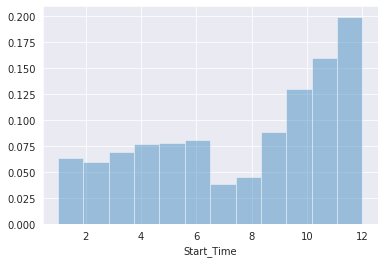

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False,norm_hist=True)

Looking through data Year by year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


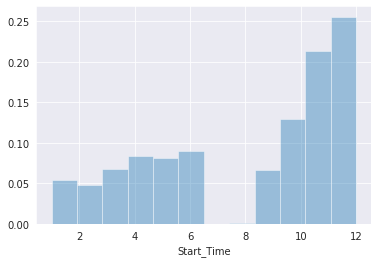

In [ ]:
d2019=df[df.Start_Time.dt.year==2019]
sns.distplot(d2019.Start_Time.dt.month, bins=12, kde=False,norm_hist=True)

Example of pie graph.

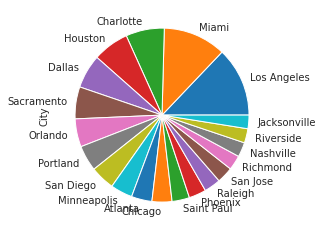

In [ ]:
city_acc[:20].plot(kind="pie")

Summary

1.   Most accidents happen during 1200 to 1800 hours
2.   



###Latitude and Longitude


Mapping of accidents on US map

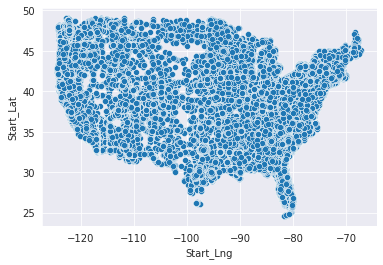

In [53]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

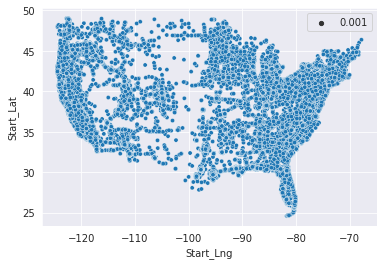

In [63]:
sample=df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample.Start_Lng,y=sample.Start_Lat,size=0.001)

Plotting points on a map

In [67]:
import folium
lat,lon=df.Start_Lat[0],df.Start_Lng[0]

In [ ]:
map =folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(map)
map

Creating heatmap with folium

In [71]:
sample=df.sample(int(0.001*len(df)))
lat_lon=list(zip(list(sample.Start_Lat),list(sample.Start_Lng)))

In [72]:
from folium.plugins import HeatMap
map=folium.Map()
HeatMap(lat_lon).add_to(map)
map